## 데이터 그룹 연산 - Groub by

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [3]:
np.random.seed(100)
df1=DataFrame({
    "Gender":["Female","male","Female","male","Female","male","Female","Female"],
    "Smoking":["Smoker","Smoker","Smoker","Non-Smoker","Non-Smoker","Non-Smoker","Non-Smoker","Smoker"],
    "countA":np.random.randint(1,10,8),
    "countB":np.random.randint(1,10,8),
    
})
df1

Gender     Smoking  countA  countB
0  Female      Smoker       9       6
1    male      Smoker       9       3
2  Female      Smoker       4       3
3    male  Non-Smoker       8       3
4  Female  Non-Smoker       8       2
5    male  Non-Smoker       1       1
6  Female  Non-Smoker       5       9
7  Female      Smoker       3       5

In [4]:
# groupby함수로 데이터를 그룹핑하면 DataFrameGroupby 객체가 리턴 >> 여기에 통계함수 붙여쓰기
print(df1.groupby('Gender').sum())

        countA  countB
Gender                
Female      29      25
male        18       7


In [5]:
df1.groupby('Smoking').sum()

countA  countB
Smoking                   
Non-Smoker      22      15
Smoker          25      17

In [6]:
df1.groupby('Gender').count()

Smoking  countA  countB
Gender                         
Female        5       5       5
male          3       3       3

In [5]:
# 그룹핑할 떄 2개 이상 컬럼 가능 
# 성별로 흡연여부 그룹핑
print(df1.groupby(['Gender','Smoking']).mean())

                     countA    countB
Gender Smoking                       
Female Non-Smoker  6.500000  5.500000
       Smoker      5.333333  4.666667
male   Non-Smoker  4.500000  2.000000
       Smoker      9.000000  3.000000


In [6]:
# 그룹핑할 떄 2개 이상 컬럼 가능 
# 성별로 흡연여부 그룹핑
print(df1.groupby(['Gender'])[["countA"]].sum()) # 시리즈로 반환

# 여러가지 함수/사용자정의 함수 가능
print(df1.groupby(['Gender'])[["countB"]].agg(['sum','mean','count','median',"max","min"]))

        countA
Gender        
Female      29
male        18
       countB                               
          sum      mean count median max min
Gender                                      
Female     25  5.000000     5      5   9   2
male        7  2.333333     3      3   3   1


## 실전데이터 응용

In [9]:
tips=pd.read_csv("tips.csv")
tips.head(1)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner   2.0

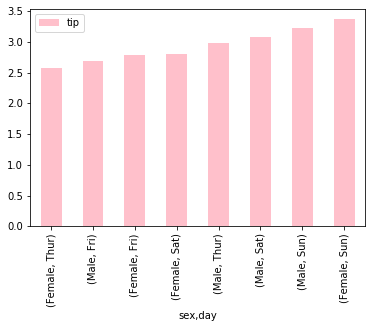

In [10]:
tips.groupby(["sex","day"])[["tip"]].mean().sort_values("tip").plot(kind="bar", color="pink")


In [11]:
tips.groupby(["sex","smoker"])[["tip"]].mean().sort_values("tip")

tip
sex    smoker          
Female No      2.773519
       Yes     2.931515
Male   Yes     3.051167
       No      3.113402

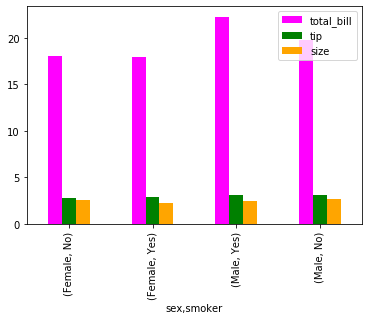

In [12]:
tips.groupby(["sex","smoker"]).mean().sort_values("tip").plot(kind="bar",color=["magenta","green","orange"])

## 알아두어야 할 함수들

In [13]:
'''
1. unique() : 중복값 제외
'''
print(df1["Gender"].unique())
print("*"*50)
'''
2. describe() : 간단한 통계 자료 출력
'''
print(df1.describe())
print("*"*50)
'''
3. sum(),mean() : 숫자데이터에만 적용됨
4. count() : 값의 개수
5. value_counts() : 해당 컬럼에서 값들이 몇번 나왔는지 세기
'''
print(df1.groupby("Gender").sum())
print("*"*50)
print(df1.groupby("Smoking").count())
print("*"*50)
print(df1["Gender"].value_counts())
print("*"*50)

'''
6. apply
pandas에서 사용자정의 함수를 적용시킬 때 사용
'''
def plus(x):
    return x+1002
print(df1["countA"])
print("*"*50)
print(df1["countA"].apply(plus))

'''
7. columns , info : 컬럼 정보 확인
'''
print("*"*50)
print(df1.columns)
print("*"*50)
print(df1.describe)

['Female' 'male']
**************************************************
         countA   countB
count  8.000000  8.00000
mean   5.875000  4.00000
std    3.044316  2.56348
min    1.000000  1.00000
25%    3.750000  2.75000
50%    6.500000  3.00000
75%    8.250000  5.25000
max    9.000000  9.00000
**************************************************
        countA  countB
Gender                
Female      29      25
male        18       7
**************************************************
            Gender  countA  countB
Smoking                           
Non-Smoker       4       4       4
Smoker           4       4       4
**************************************************
Female    5
male      3
Name: Gender, dtype: int64
**************************************************
0    9
1    9
2    4
3    8
4    8
5    1
6    5
7    3
Name: countA, dtype: int32
**************************************************
0    1011
1    1011
2    1006
3    1010
4    1010
5    1003
6    1007
7    1005
Name:

## Pivot Table

In [14]:
'''
pivot table함수를 사용하여 DataFrame의 데이터를 가공한다.
'''
data={
    "도시":["서울","서울","서울","부산","부산","부산","인천","인천"],
    "연도":[2015,2010,2005,2015,2010,2005,2015,2010],
    "인구":[990431,963148,976254,334487,333231,300231,289045,257812],
    "지역":["수도권","수도권","수도권","경상권","경상권","경상권","수도권","수도권"]
}

df2=DataFrame(data)
df2

도시    연도      인구   지역
0  서울  2015  990431  수도권
1  서울  2010  963148  수도권
2  서울  2005  976254  수도권
3  부산  2015  334487  경상권
4  부산  2010  333231  경상권
5  부산  2005  300231  경상권
6  인천  2015  289045  수도권
7  인천  2010  257812  수도권

In [15]:
df2.pivot_table(index="도시",columns="연도",values="인구")
df2.pivot_table(index="도시",columns="연도",margins_name="10년간 도시 인구 평균",margins=True)


인구                                             
연도                 2005           2010           2015  10년간 도시 인구 평균
도시                                                                  
부산             300231.0  333231.000000  334487.000000  322649.666667
서울             976254.0  963148.000000  990431.000000  976611.000000
인천                  NaN  257812.000000  289045.000000  273428.500000
10년간 도시 인구 평균  638242.5  518063.666667  537987.666667  555579.875000

In [16]:
df2.pivot_table(index=["도시","연도"])

인구
도시 연도          
부산 2005  300231
   2010  333231
   2015  334487
서울 2005  976254
   2010  963148
   2015  990431
인천 2010  257812
   2015  289045

## 실전데이터 피벗 응용

In [17]:
tip=pd.read_csv("tips.csv")
tip

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner   2.0
1         10.34  1.66    Male     No   Sun  Dinner   3.0
2         21.01  3.50    Male     No   Sun  Dinner   3.0
3         23.68  3.31    Male     No   Sun  Dinner   2.0
4         24.59  3.61  Female     No   Sun  Dinner   4.0
..          ...   ...     ...    ...   ...     ...   ...
240       27.18  2.00  Female    Yes   Sat  Dinner   2.0
241       22.67  2.00    Male    Yes   Sat  Dinner   2.0
242       17.82  1.75    Male     No   Sat  Dinner   2.0
243       18.78  3.00  Female     No  Thur  Dinner   2.0
244       25.34   NaN     NaN    NaN   NaN     NaN   NaN

[245 rows x 7 columns]

In [18]:
'''
분석의 목표 : 식사대금 대비 팁의 비율이 어떤 경우에 가장 높아지는지 알고 싶다.
식사대금과 팁의 비율 컬럼 추가
'''
tips["tip_pct"]=tips["tip"]/tips["total_bill"]*100
tips.dropna(inplace=True)
print(tips.describe())
tips.info()

       total_bill         tip        size     tip_pct
count  244.000000  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672   16.080258
std      8.902412    1.383638    0.951100    6.107220
min      3.070000    1.000000    1.000000    3.563814
25%     13.347500    2.000000    2.000000   12.912736
50%     17.795000    2.900000    2.000000   15.476977
75%     24.127500    3.562500    3.000000   19.147549
max     50.810000   10.000000    6.000000   71.034483
<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    float64
 7   tip_pct     244 non-null    float64


In [19]:
tips.pivot_table(index="day",aggfunc=["mean","sum"])
tips.corr()

total_bill       tip      size   tip_pct
total_bill    1.000000  0.675734  0.598315 -0.338624
tip           0.675734  1.000000  0.489299  0.342370
size          0.598315  0.489299  1.000000 -0.142860
tip_pct      -0.338624  0.342370 -0.142860  1.000000

In [20]:
tips.pivot_table(index=["sex","day"],aggfunc=["mean"], columns="smoker", values=["total_bill","tip"])


mean                                
                  tip           total_bill           
smoker             No       Yes         No        Yes
sex    day                                           
Female Fri   3.125000  2.682857  19.365000  12.654286
       Sat   2.724615  2.868667  19.003846  20.266667
       Sun   3.329286  3.500000  20.824286  16.540000
       Thur  2.459600  2.990000  16.014400  19.218571
Male   Fri   2.500000  2.741250  17.475000  20.452500
       Sat   3.256563  2.879259  19.929063  21.837778
       Sun   3.115349  3.521333  20.403256  26.141333
       Thur  2.941500  3.058000  18.486500  19.171000

In [21]:
# tip을 성별로 그룹핑, 컬럼은 흡연여부, 통계함수는 count
tips.pivot_table(index="sex",aggfunc=["sum"], columns="smoker", values=["tip","tip_pct"],margins=True,margins_name="총계")


sum                                                       
           tip                      tip_pct                          
smoker      No     Yes      총계           No          Yes           총계
sex                                                                  
Female  149.77   96.74  246.51   847.373242   601.096164  1448.469406
Male    302.00  183.07  485.07  1558.486537   916.627051  2475.113588
총계      451.77  279.81  731.58  2405.859779  1517.723215  3923.582994

## 문제 1

In [22]:
'''
성별에 따른 평균 팁비율을 구하라
'''
tips.pivot_table(index="sex", values="tip_pct")
tips.groupby("sex")[["tip_pct"]].mean()
tips.groupby("sex")["tip_pct"].agg(["mean"])

mean
sex              
Female  16.649074
Male    15.765055

In [23]:
## 문제 2
tips.pivot_table(index=["sex","smoker"],values="tip_pct")
tips.groupby(["sex","smoker"])[["tip_pct"]].mean()
tips.groupby(["sex","smoker"])[["tip_pct"]].agg("mean")

tip_pct
sex    smoker           
Female No      15.692097
       Yes     18.215035
Male   No      16.066872
       Yes     15.277118

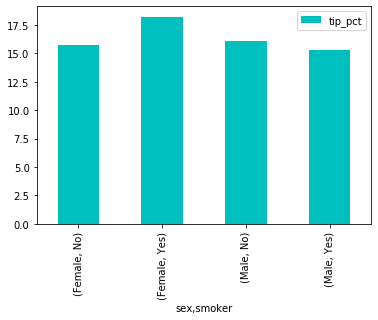

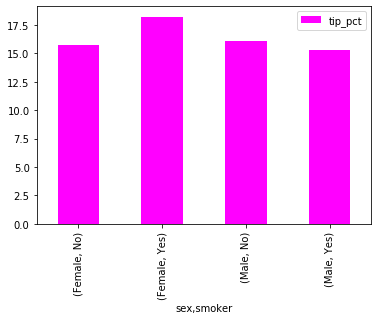

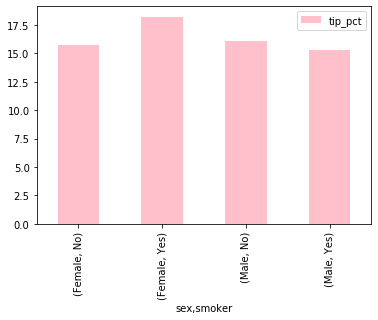

In [24]:

tips.pivot_table(index=["sex","smoker"],values="tip_pct").plot(kind="bar",color="c")
tips.groupby(["sex","smoker"])[["tip_pct"]].mean().plot(kind="bar",color="magenta")
tips.groupby(["sex","smoker"])[["tip_pct"]].agg("mean").plot(kind="bar",color="pink")

In [30]:
def max_min_tip(x):
    return x.max()-x.min()

tip.pivot_table(index=['sex','smoker'])
tip.groupby(by=['sex','smoker'])[['tip']].agg(max_min_tip)

tip
sex    smoker      
Female No      4.20
       Yes     5.50
Male   No      7.75
       Yes     9.00